<a href="https://colab.research.google.com/github/vlad-bb/Python-Data-Science/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" по ссылке

In [3]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
data = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")

In [6]:
df_data = data[0]

Замените в таблице значения "—" на значения NaN

In [7]:
df_data = df_data.replace("—", np.nan)


Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [9]:
df_data['2014'] = df_data['2014'].astype(float)
df_data['2019'] = df_data['2019'].astype(float)


In [43]:
df_statistic = df_data.fillna(df_data.mean(numeric_only=True), axis=0)


# Графік народжуванності 

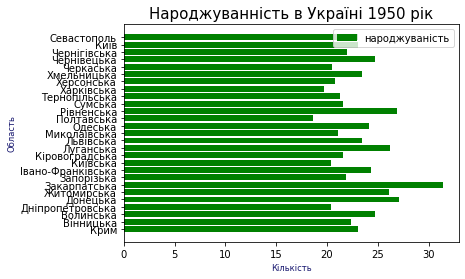

In [33]:
years = df_statistic['1950'][:27]
region = df_statistic['Регіон'][:27]
plt.barh(region, years, color=['g'], label='народжуваність')

plt.xlabel('Кількість', fontsize='small', color='midnightblue')
plt.ylabel('Область', fontsize='small', color='midnightblue')
plt.title('Народжуванність в Україні 1950 рік', fontsize=15)
plt.legend()
plt.show()

Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [39]:

max_level = df_statistic.loc[df_statistic['2019'] > df_statistic['2019'][27]]
max_level

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,24.700000,25.0,17.9,15.3,11.2,14.8,14.1,10.1
6,Закарпатська,31.400000,27.3,20.7,16.8,11.5,15.1,14.6,10.4
8,Івано-Франківська,24.300000,24.8,18.2,15.5,10.3,12.4,12.2,8.8
12,Львівська,23.400000,24.0,17.1,14.0,9.1,11.9,11.9,8.7
14,Одеська,24.100000,19.2,14.8,12.6,8.0,12.7,12.3,8.8
16,Рівненська,26.900000,26.7,19.3,15.8,11.8,15.9,14.8,10.7
23,Чернівецька,24.700000,21.8,17.0,14.8,10.1,12.8,12.9,9.2
25,Київ,23.092308,17.4,15.9,12.0,7.3,12.0,12.1,11.0


In [48]:
!pip install seaborn
import seaborn as sns

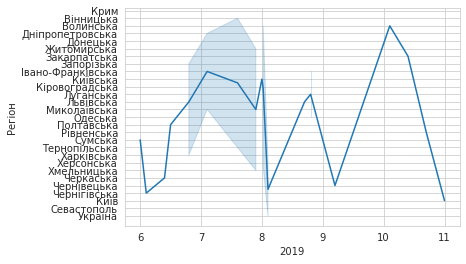

In [57]:
# sns.set_style("darkgrid")
sns.set_style("whitegrid")
sns.lineplot(y=df_statistic['Регіон'], x=df_statistic['2019'], data=df_statistic);

Постройте столбцовую диаграмму рождаемости по регионам в 2019 году


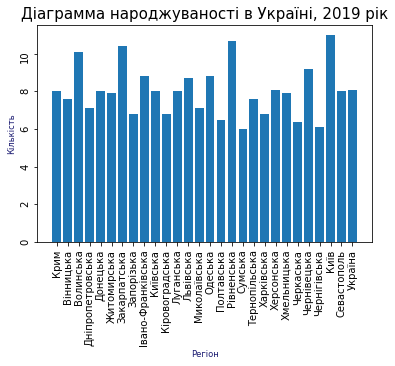

In [ ]:
# df_mean[['Регіон','2019']]
plt.bar(df_mean['Регіон'], df_mean['2019'])
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Кількість", fontsize="small", color="midnightblue")
plt.title("Діаграмма народжуваності в Україні, 2019 рік", fontsize=15)
plt.tick_params(labelrotation = 90)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Статистика по заробітній платі 2017 рік


In [62]:
df_salary = pd.read_csv('/content/Average_salary_2017.csv')
df_salary

,position,min_salary,max_salary,mean_salary
0,Data Scientist / Data Analyst,2700,2700,2700
1,DevOps,7000,7000,7000
2,ERP / CRM,2000,2000,2000
3,HTML coder,385,600,457
4,Junior Software Engineer,75,2600,605
5,Product Manager,3000,3000,3000
6,Senior Software Engineer,350,9200,3243
7,Software Engineer,100,7000,1678
8,System Architect,400,10000,4387
9,Team lead,2500,4000,3250


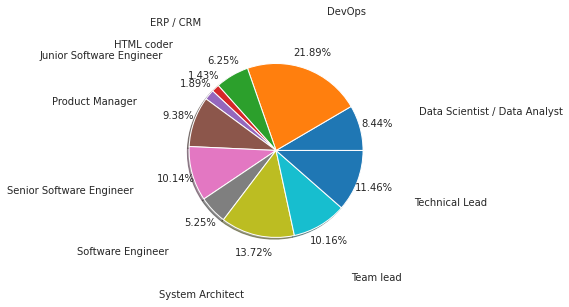

In [66]:
labels = df_salary['position']
data = df_salary['mean_salary']

plt.pie(
    data,
    labels=labels,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.2,
    labeldistance=1.7,
)

plt.show()

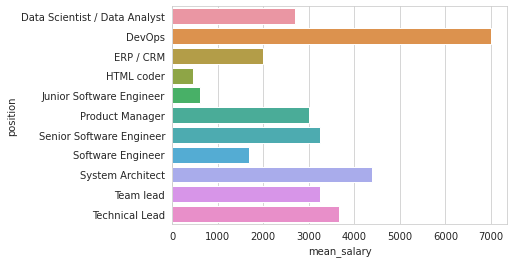

In [70]:
sns.barplot

# Статистика по книгам


In [74]:
df_books = pd.read_csv('/content/bestsellers with categories.csv')
df_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


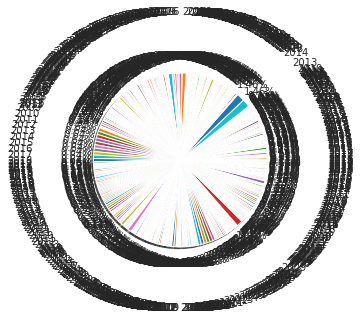

In [79]:
labels = df_books['Year']
data = df_books['Price']

plt.pie(
    data,
    labels=labels,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.2,
    labeldistance=1.7,
)

plt.show()

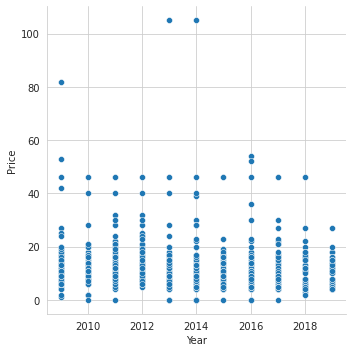

In [80]:
sns.relplot(x = 'Year', y = 'Price', data = df_books)

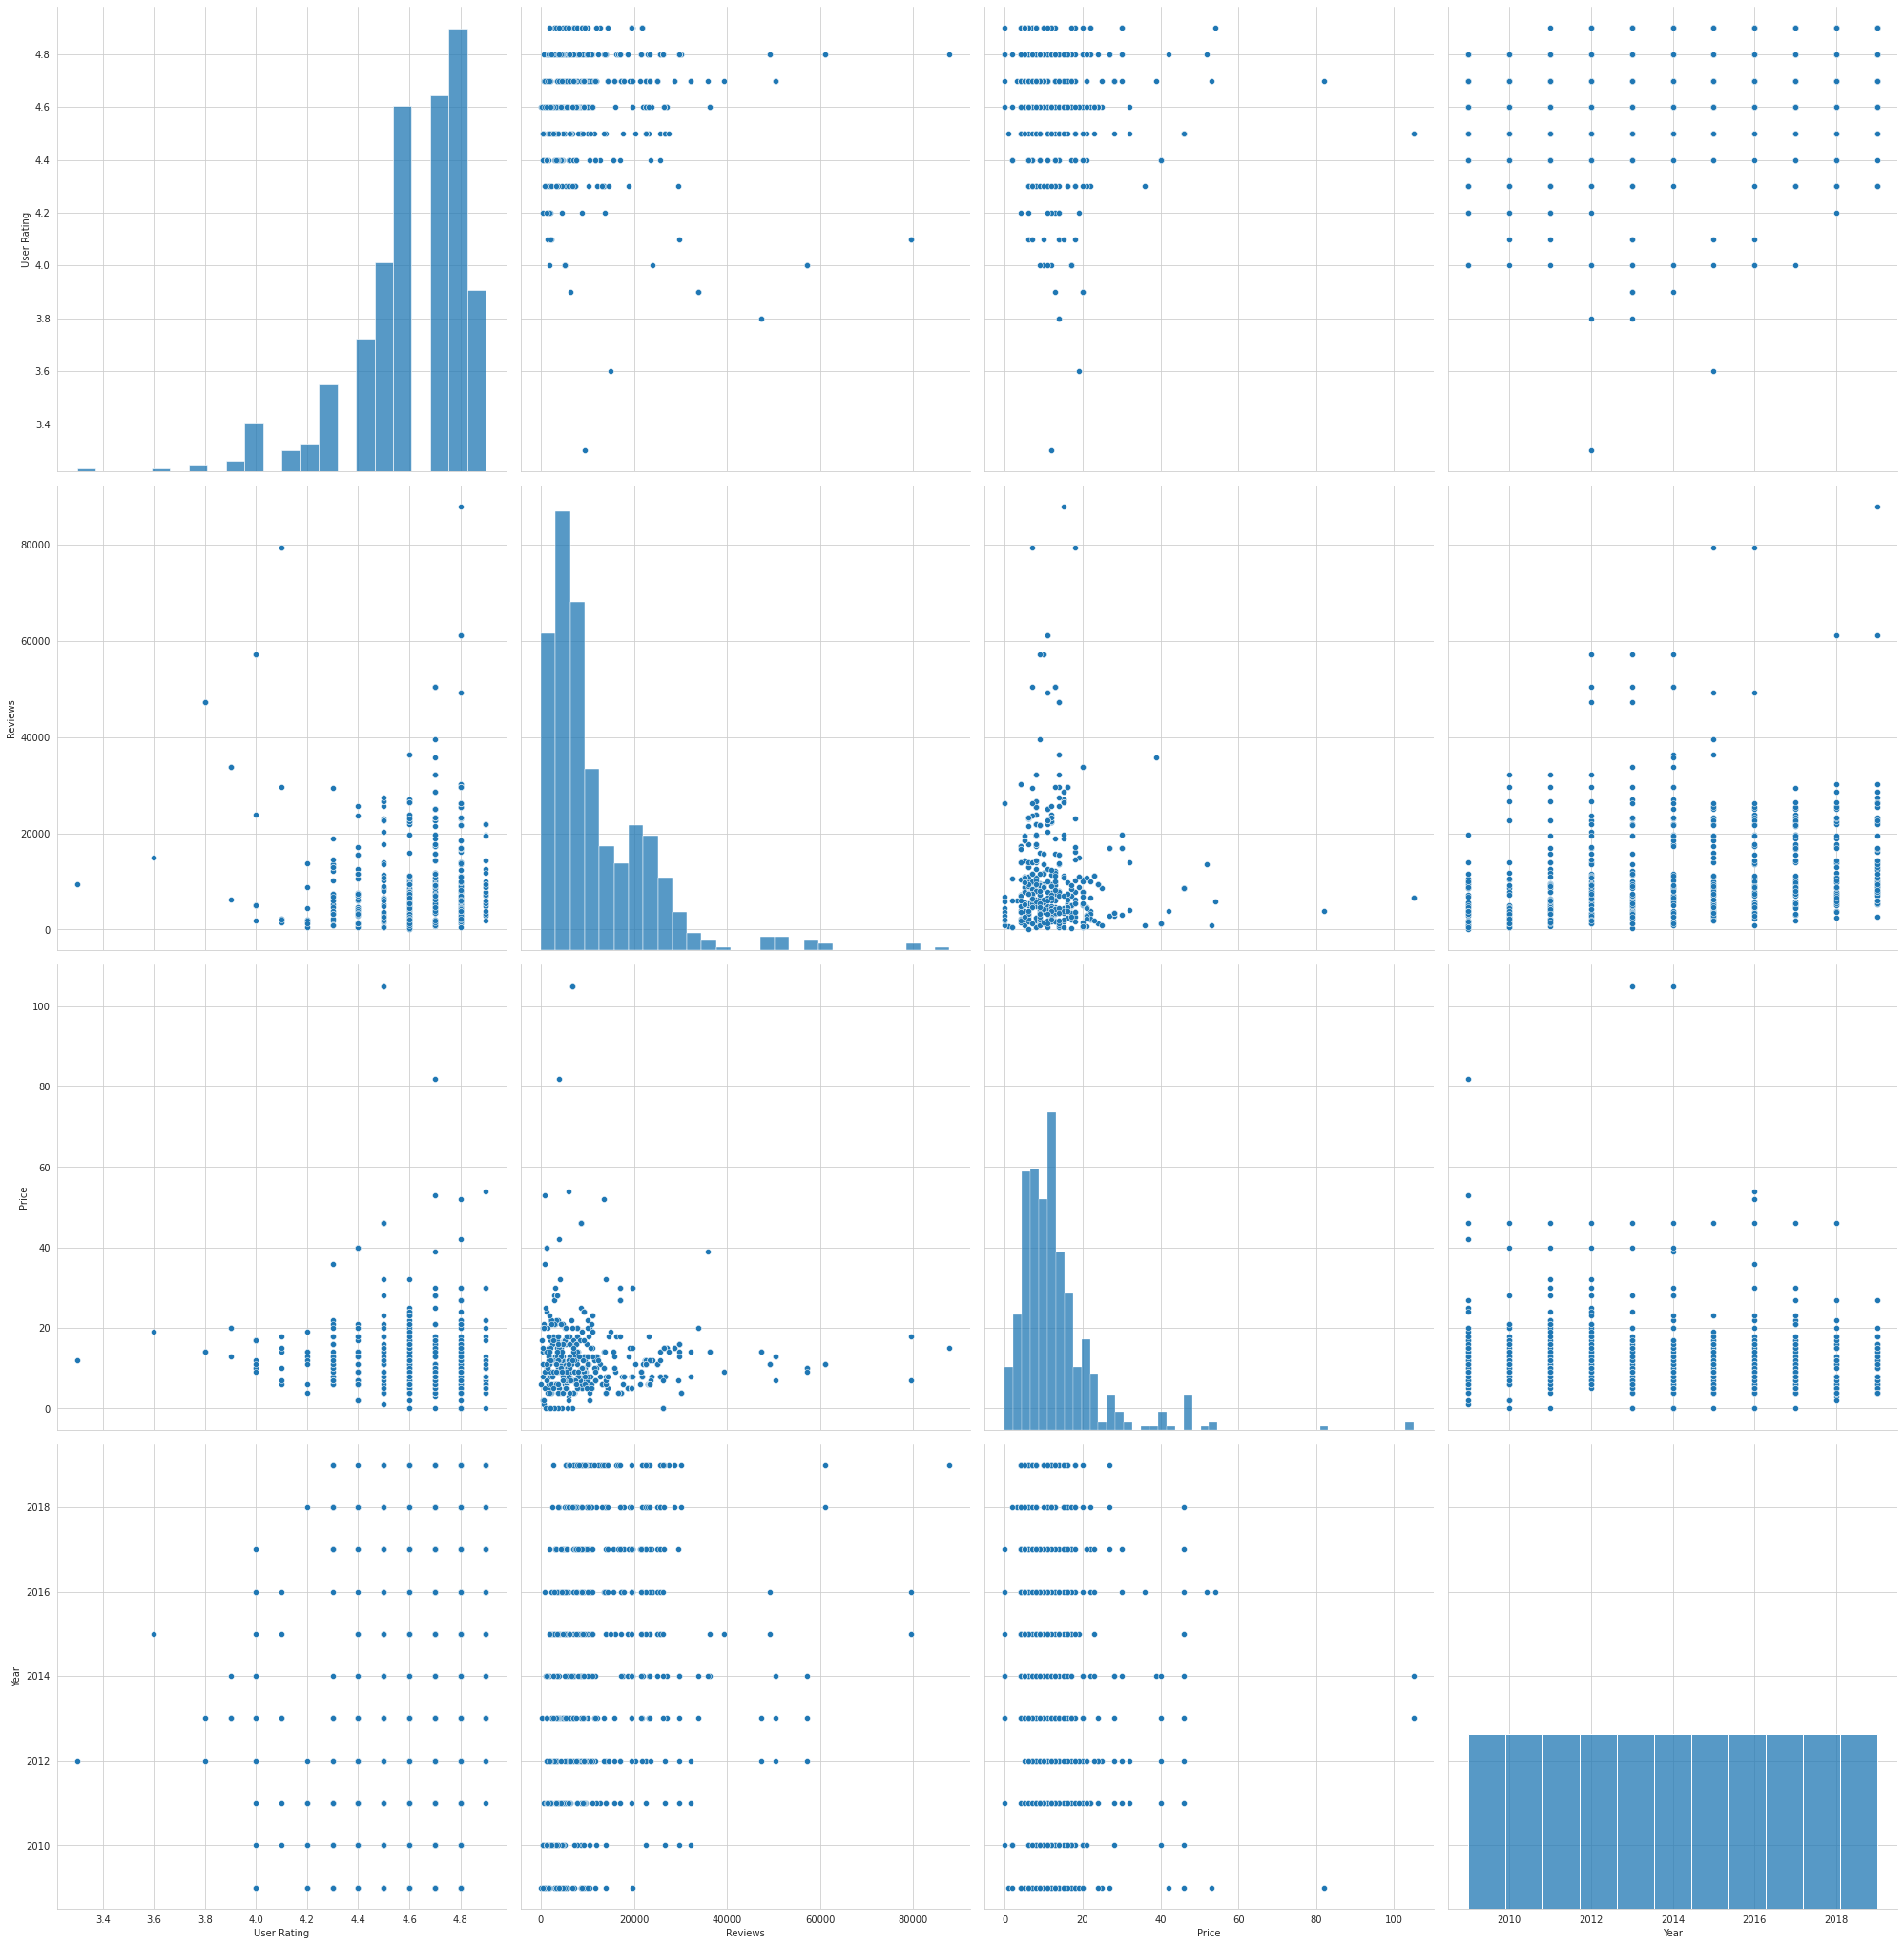

In [81]:
graph=sns.pairplot(df_books)
graph.fig.set_size_inches(30, 30)